# I. Perkenalan


Nama : Samuel Kristianto Pardomuan Naiborhu

Batch : FTDS-015

Dataset : Telco Customer Churn

Objective : Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs

# II. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model 

import joblib
import json


2022-10-08 15:26:33.020905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-08 15:26:33.256540: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-08 15:26:33.256568: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-08 15:26:33.292174: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-08 15:26:34.192468: W tensorflow/stream_executor/platform/de

# III.Data Loading

In [2]:
# Data Loading

raw_data = pd.read_csv('h8dsft_Milestone1P2_Samuel_Naiborhu.csv')
pd.set_option('display.max_columns', None)
raw_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
raw_data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# IV. Exploratory Data Analysis

In [4]:
raw_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# view the average tenure of customers churn
raw_data[raw_data['Churn'] == 'Yes']['tenure'].mean()

17.979133226324237

In [6]:
# view the average tenure of staying customers
raw_data[raw_data['Churn'] == 'No']['tenure'].mean()

37.56996521066873

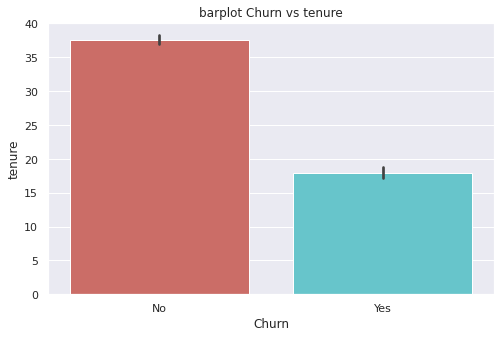

In [7]:
# Create plots

plt.figure(figsize=(8, 5))

# plt.subplot(1,2,1)
sns.barplot(x=raw_data['Churn'],y=raw_data['tenure'], palette='hls')
plt.title('barplot Churn vs tenure')

plt.show()


From the query we've done, and the chart above, we found that on average the tenure of customer who left(churn=Yes)(on average 17.979 months) is far lower than the customer who stays(churn=No) (on average 37.57 months)

In [8]:
# view the average MonthlyCharges of customers churn
raw_data[raw_data['Churn'] == 'Yes']['MonthlyCharges'].mean()

74.4413322632423

In [9]:
# view the average MonthlyCharges of staying customers
raw_data[raw_data['Churn'] == 'No']['MonthlyCharges'].mean()

61.2651236953999

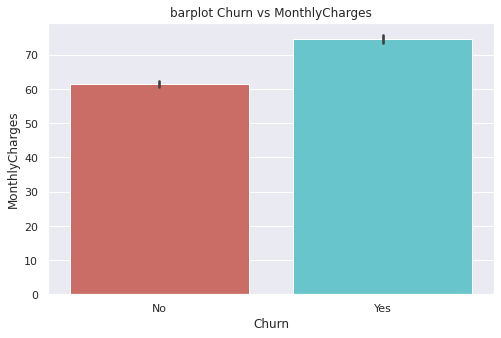

In [10]:
# Create plots

plt.figure(figsize=(8, 5))

# plt.subplot(1,2,1)
sns.barplot(x=raw_data['Churn'],y=raw_data['MonthlyCharges'], palette='hls')
plt.title('barplot Churn vs MonthlyCharges')

plt.show()


From the query we've done, and the chart above, we found that on average the MonthlyCharges of Customer churn(churn=Yes)(on average \$ 74.441 ) is higher than the average MonthlyCharges of staying customer(churn=No) (on average \$ 61.265 )

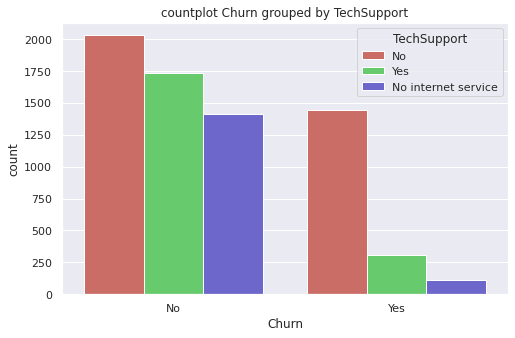

In [11]:
# Create plots

plt.figure(figsize=(8, 5))

# plt.subplot(1,2,1)
sns.countplot(x=raw_data['Churn'],hue=raw_data['TechSupport'], palette='hls')
plt.title('countplot Churn grouped by TechSupport')

plt.show()


from the chart above, we found the customer churn(churn=Yes), compared to staying customer(churn=No) are less willing to ask help from tech support. It seems the customers who churn, when something went wrong, rather than asking for help, they cancelled instead.

In [12]:
raw_data['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

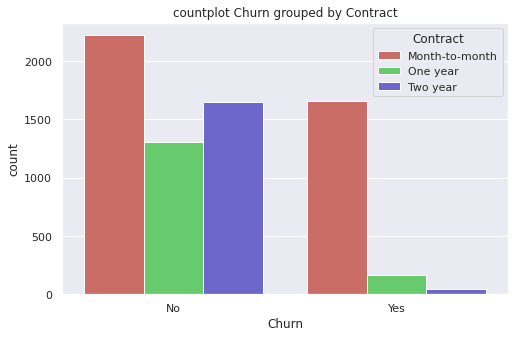

In [14]:
# Create plots

plt.figure(figsize=(8, 5))

# plt.subplot(1,2,1)
sns.countplot(x=raw_data['Churn'],hue=raw_data['Contract'], palette='hls')
plt.title('countplot Churn grouped by Contract')

plt.show()



from the chart above, we found the customer churn(churn = Yes), almost all of them had monthly contract. While the staying customer(churn = No), are a bit diverse. The reason why customers stay, could be caused by the contract themselves, the long term contract(1 year and 2 year on not churned group) cant cancel easily, because if they want to cancel, they will get a huge penalty for the cancelations.


# V. Data Preprocessing

## V.I. Split data for inference

In [13]:
# Get inference count for 3 percent data
inf_count =  round(raw_data.shape[0]*0.03)
inf_count

211

In [14]:
# Get Data for model inference
data_inf = raw_data.sample(inf_count, random_state=33)
data_inf.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2471,1323-OOEPC,Female,0,Yes,No,53,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),98.4,5149.5,Yes
2572,9153-BTBVV,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.0,1753,No
1369,5478-JJVZK,Female,0,No,No,33,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,60.9,2033.85,No
5623,9115-YQHGA,Male,0,No,No,40,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,51.1,2092.9,No
4989,0909-SDHNU,Female,0,No,Yes,7,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.8,201.95,No


In [15]:
# drop data_inf from main dataframe
raw_data_1 = raw_data.drop(data_inf.index)
print(f'old data size: {raw_data.shape[0]}')
print(f'new data size: {raw_data_1.shape[0]}')

old data size: 7043
new data size: 6832


In [16]:
raw_data_2 = raw_data_1.copy()

In [17]:
data_inf['TotalCharges']

5832    1470.95
6754           
126      2135.5
6930     216.75
4200     3921.1
         ...   
6235      880.2
2292       4965
2083      20.15
2358    1140.05
600      1170.5
Name: TotalCharges, Length: 211, dtype: object

In [18]:
# Reset Index

raw_data_1.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [19]:
data_inf.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6017-PPLPX,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.45,1470.95,Yes
1,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
2,4412-YLTKF,Female,1,No,No,27,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.05,2135.5,Yes


## V.II. Split train test dataset

In [20]:
# define features variable as X
X = raw_data_1.drop('Churn', axis=1)

In [21]:
# define target variable as y
y = raw_data_1['Churn']
y.sample(5)

4946     No
5248    Yes
1098     No
1799     No
4424     No
Name: Churn, dtype: object

In [22]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=33)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=33)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5533, 20)
Val Size :  (615, 20)
Test Size :  (684, 20)


## V.III. Handling Missing values

In [23]:
# Check Missing Values on X_train

X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Since there are no missing values, we can skip this step

## V.IV. Handling Outlier

In [24]:
# make plot for outlier

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()

In [25]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    if -0.5 > skew_value < 0.5:
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else:
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundary= feature.quantile(0.25)-(IQR*1.5)
        upper_boundary= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundary, upper_boundary

In [26]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

In [27]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns :  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [28]:
# remove customerID because its not needed for modelling
cat_columns.remove('customerID')
cat_columns.remove('TotalCharges')

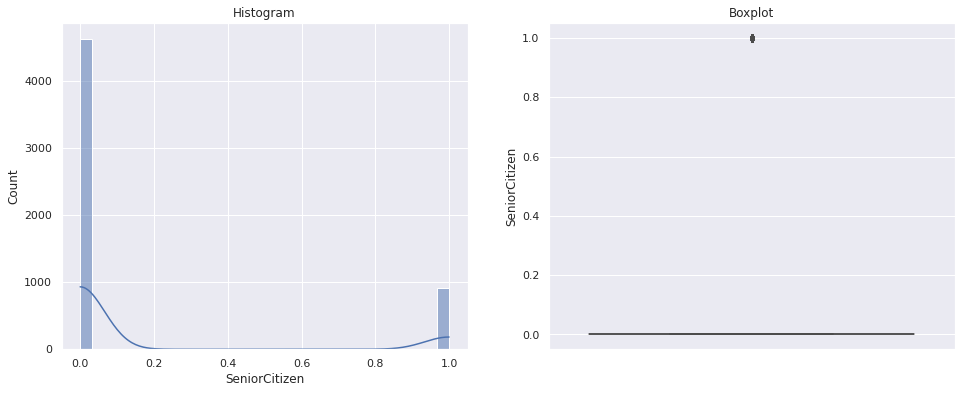

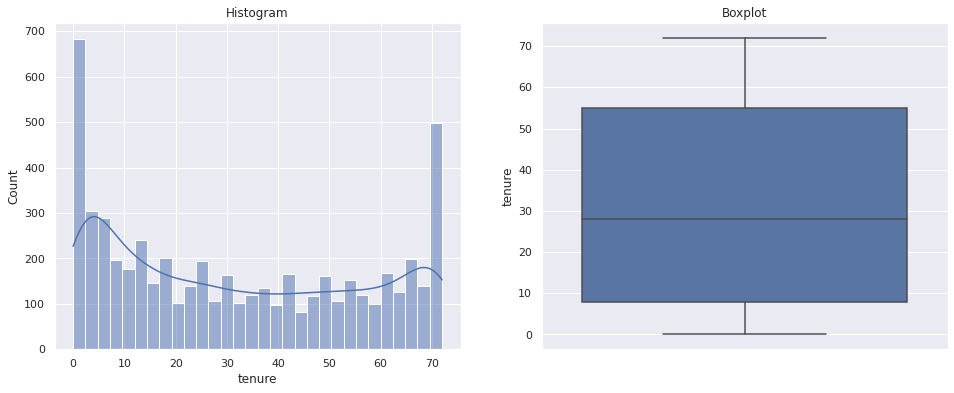

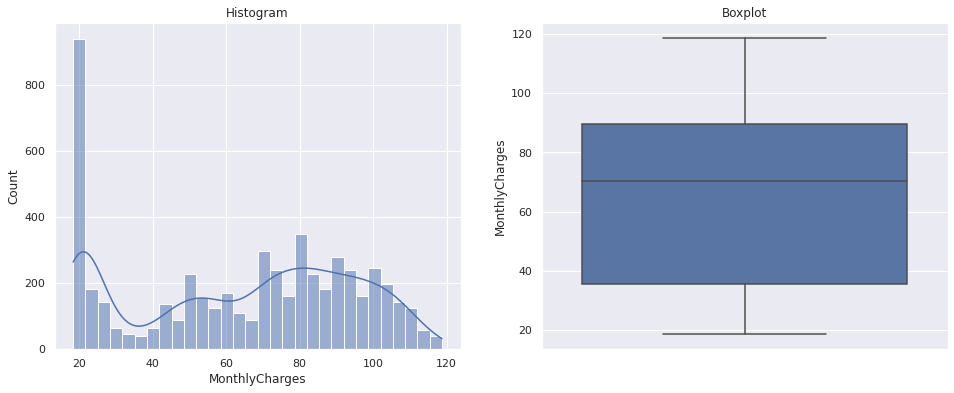

In [29]:
# plotting for numerical columns
for i in num_columns:
  outlier_plot(X_train[i])

In [30]:
# Capping numerical columns
X_train_2 = X_train.copy()
for i in num_columns:
    capping_data(X_train_2, i)

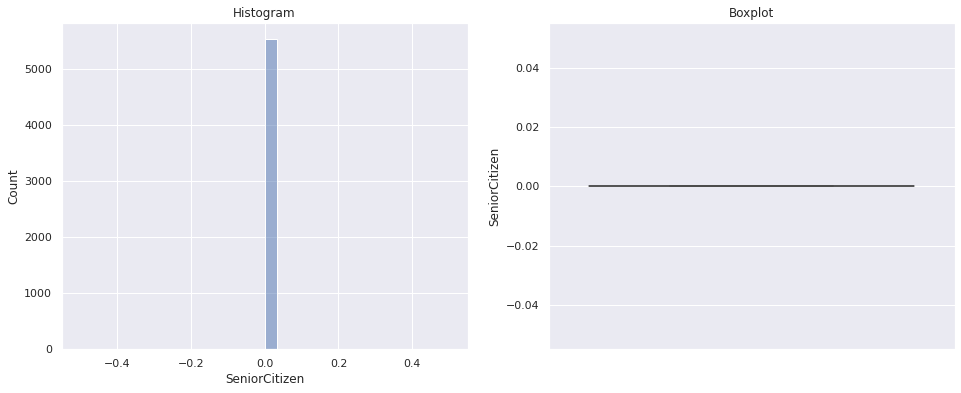

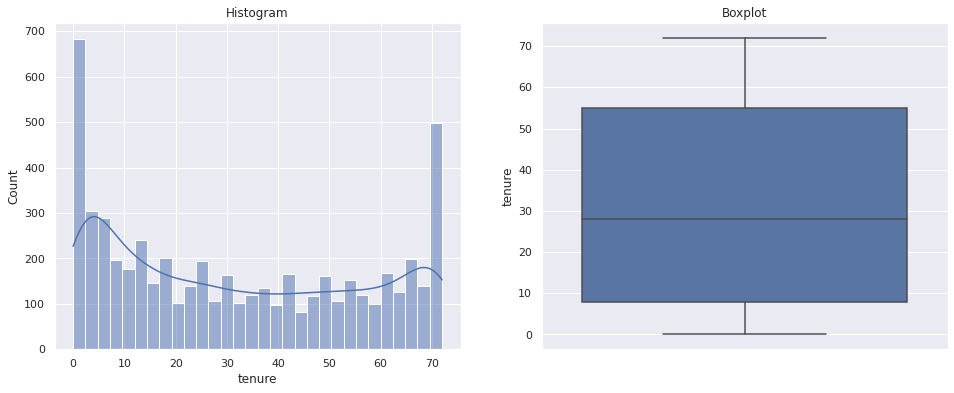

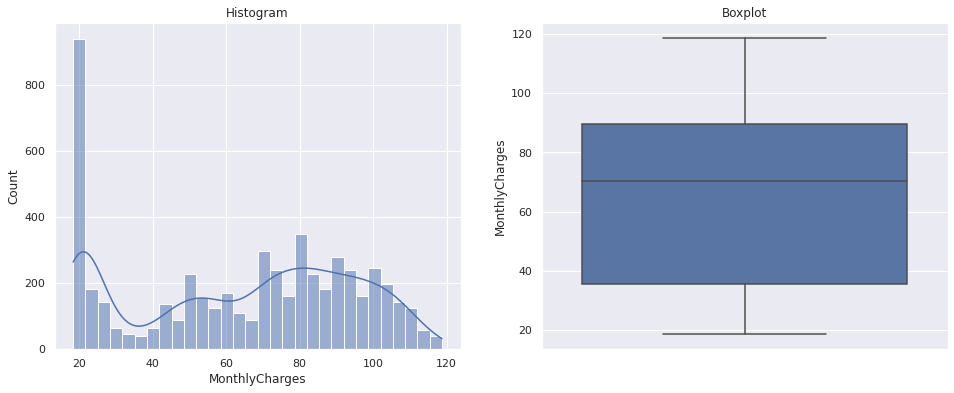

In [31]:
# recheck for outlier_list
for i in num_columns:
  outlier_plot(X_train_2[i])

## V.V. Feature selection

In [32]:
# find corelation between features
X_train_cor = X_train_2.corr() 

In [33]:
# summarize correlation between features
X_train_cor

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,NaN,NaN,NaN
tenure,NaN,1.000000,0.245284
MonthlyCharges,NaN,0.245284,1.000000


There are no correlation whatsoever between the features. We're not going to remove any feature.

## V.VI. Encoding

In [34]:
# encode using one hot encoding
# Creating instance of one_hot encoder
encoder = OneHotEncoder(sparse=False)
encoder_2 = LabelEncoder()

# perform one-hot encoding on categorical column
encoder_cat_train = encoder.fit_transform(X_train_2[cat_columns])
encoder_cat_test = encoder.fit_transform(X_test[cat_columns])
encoder_cat_val = encoder.fit_transform(X_val[cat_columns])

# perform one-hot encoding on target column
encoder_2.fit(y_train)

y_train_final = encoder_2.transform(y_train)
y_test_final = encoder_2.transform(y_test)
y_val_final = encoder_2.transform(y_val)

In [35]:
encoder_cat_val

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

## V.VII. Scaling

In [36]:
X_train_num = X_train_2[num_columns]
X_test_num = X_test[num_columns]
X_val_num = X_val[num_columns]

In [37]:
# Define scaler
scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_num_scaled = scaler.transform(X_val_num)

In [38]:
# concate columns

x_train_final = np.concatenate([X_train_num_scaled, encoder_cat_train], axis=1)
x_test_final = np.concatenate([X_test_num_scaled, encoder_cat_test], axis=1)
x_val_final = np.concatenate([X_val_num_scaled, encoder_cat_val], axis=1)

x_test_final

array([[0.        , 0.09722222, 0.59940209, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01388889, 0.5630294 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.06944444, 0.02242152, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.01388889, 0.67414051, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.19444444, 0.01295466, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01388889, 0.51519681, ..., 0.        , 1.        ,
        0.        ]])

# VI. Modelling

## VI.I. Sequential API


### VI.I.I Define Model

In [39]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(5, activation='relu', input_shape=(44,))) # Hidden Layer 1
model_sequential.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 225       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


### VI.I.II Train and evaluate Model using pipeline

In [40]:
# create training dataset instance
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_final, y_train_final))

# shuffle and slice train dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)

# create validation dataset instance
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_final, y_val_final))
val_dataset = val_dataset.batch(64)

# create test dataset instance
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_final, y_test_final))
test_dataset = test_dataset.batch(64)

## Train model
history_seq = model_sequential.fit(train_dataset, epochs=30, validation_data=val_dataset)

## Evaluate on validat dataset.
print("\nEvaluate on test data")
result = model_sequential.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')



Epoch 1/30
44/44 [==============================] - 4s 6ms/step - loss: 0.7639 - accuracy: 0.4864 - val_loss: 0.6319 - val_accuracy: 0.6537
Epoch 2/30
44/44 [==============================] - 0s 4ms/step - loss: 0.5824 - accuracy: 0.7141 - val_loss: 0.5554 - val_accuracy: 0.7447
Epoch 3/30
44/44 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7553 - val_loss: 0.5145 - val_accuracy: 0.7724
Epoch 4/30
44/44 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.7743 - val_loss: 0.4885 - val_accuracy: 0.7772
Epoch 5/30
44/44 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.7828 - val_loss: 0.4731 - val_accuracy: 0.7740
Epoch 6/30
44/44 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.7893 - val_loss: 0.4652 - val_accuracy: 0.7756
Epoch 7/30
44/44 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.7943 - val_loss: 0.4606 - val_accuracy: 0.7789
Epoch 8/30
44/44 [==

In [41]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.763949,0.486355,0.631862,0.653659
1,0.582355,0.714079,0.555396,0.744715
2,0.522804,0.755286,0.514526,0.772358
3,0.485047,0.774264,0.488522,0.777236
4,0.460802,0.782758,0.473115,0.773984
5,0.445597,0.789264,0.465188,0.775610
6,0.436859,0.794325,0.460641,0.778862
7,0.431435,0.795409,0.458166,0.785366
8,0.427979,0.795590,0.456956,0.785366
9,0.425481,0.797397,0.455656,0.786992


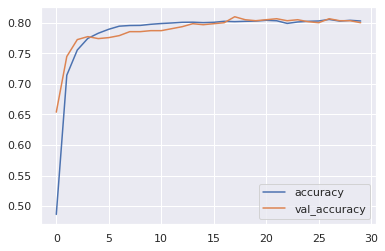

In [42]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

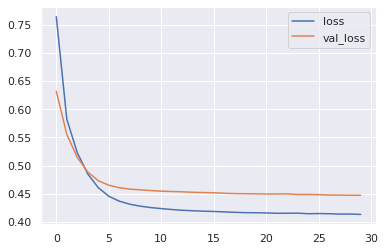

In [43]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [44]:
# Model Evaluation using Classification Report

y_pred_seq = model_sequential.predict(x_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       497
           1       0.61      0.57      0.59       187

    accuracy                           0.78       684
   macro avg       0.73      0.72      0.72       684
weighted avg       0.78      0.78      0.78       684



### Model Analysis

from the sequential model, if we want to predict a customers that stays(churn=0) the model can predict 84(true positive) out of 100 customers that predicted customer will stay(all positives),correctly(precision score). 

while predictions of customers that left(churn=1) can only predict 61(true positive) out of 100 customers that predicted customer will leave(all positives), correctly(precision score).



## VI.II. Modelling Functional


### VI.II.I Define Model


In [45]:
# Create Functional Model
input_layer = Input(shape=(44,))
hidden_layer = Dense(4, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Model Compile
model_functional.compile(loss='binary_crossentropy', 
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 180       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


### VI.II.II Train and evaluate Model using pipeline

In [46]:
# create training dataset instance
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_final, y_train_final))

# shuffle and slice train dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)

# create validation dataset instance
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_final, y_val_final))
val_dataset = val_dataset.batch(64)

# create test dataset instance
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_final, y_test_final))
test_dataset = test_dataset.batch(64)

## Train model
history_func = model_functional.fit(train_dataset, epochs=30, validation_data=val_dataset)

## Evaluate on validat dataset.
print("\nEvaluate on test data")
result = model_functional.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')



Epoch 1/30
44/44 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.5637 - val_loss: 0.6672 - val_accuracy: 0.7496
Epoch 2/30
44/44 [==============================] - 0s 3ms/step - loss: 0.6201 - accuracy: 0.7546 - val_loss: 0.5686 - val_accuracy: 0.7593
Epoch 3/30
44/44 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.7535 - val_loss: 0.5131 - val_accuracy: 0.7496
Epoch 4/30
44/44 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.7723 - val_loss: 0.4880 - val_accuracy: 0.7626
Epoch 5/30
44/44 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.7844 - val_loss: 0.4766 - val_accuracy: 0.7659
Epoch 6/30
44/44 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.7876 - val_loss: 0.4715 - val_accuracy: 0.7675
Epoch 7/30
44/44 [==============================] - 0s 6ms/step - loss: 0.4437 - accuracy: 0.7905 - val_loss: 0.4691 - val_accuracy: 0.7740
Epoch 8/30
44/44 [==

In [47]:
# Create Dataframe

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.689541,0.563709,0.667165,0.749593
1,0.620055,0.754564,0.568637,0.759350
2,0.533696,0.753479,0.513055,0.749593
3,0.487575,0.772275,0.487985,0.762602
4,0.463906,0.784385,0.476566,0.765854
5,0.451072,0.787638,0.471496,0.767480
6,0.443686,0.790530,0.469143,0.773984
7,0.438963,0.790349,0.467449,0.773984
8,0.435571,0.794144,0.466186,0.777236
9,0.432554,0.794867,0.464478,0.780488


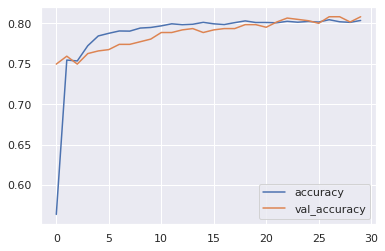

In [48]:
# Plot between Accuracy and val_accuracy

history_func_df[['accuracy', 'val_accuracy']].plot()

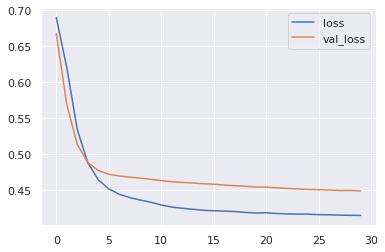

In [49]:
history_func_df[['loss', 'val_loss']].plot()

In [50]:
# Model Evaluation using Classification Report

y_pred_func = model_functional.predict(x_test_final)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       497
           1       0.62      0.54      0.58       187

    accuracy                           0.78       684
   macro avg       0.73      0.71      0.71       684
weighted avg       0.77      0.78      0.78       684



### Model Analysis

from the functional model, if we want to predict a customers that stays(churn=0) the model can predict 83(true positive) out of 100 customers that predicted customer will stay(all positives),correctly(precision score). 

while predictions of customers that left(churn=1) can only predict 61(true positive) out of 100 customers that predicted customer will leave(all positives), correctly(precision score).

from both functional model and sequantial model, with little to no tuning, the results are almost identical.

# VII. Model Improvements

## VII.I. Sequential API


In [51]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(42, activation='relu', input_shape=(44,))) # Hidden Layer 1
model_sequential.add(Dense(36, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(10, activation='relu')) # Hidden Layer 3
model_sequential.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile
tf.keras.optimizers.Adamax(learning_rate = 0.0075)
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='AdaMax',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 42)                1890      
                                                                 
 dense_5 (Dense)             (None, 36)                1548      
                                                                 
 dense_6 (Dense)             (None, 10)                370       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,819
Trainable params: 3,819
Non-trainable params: 0
_________________________________________________________________


In [52]:
# create training dataset instance
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_final, y_train_final))

# shuffle and slice train dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)

# create validation dataset instance
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_final, y_val_final))
val_dataset = val_dataset.batch(64)

# create test dataset instance
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_final, y_test_final))
test_dataset = test_dataset.batch(64)

## Train model
history_seq = model_sequential.fit(train_dataset, epochs=100, validation_data=val_dataset)

## Evaluate on validat dataset.
print("\nEvaluate on test data")
result = model_sequential.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')



Epoch 1/100
44/44 [==============================] - 1s 11ms/step - loss: 0.5784 - accuracy: 0.7358 - val_loss: 0.5255 - val_accuracy: 0.7431
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.4958 - accuracy: 0.7365 - val_loss: 0.4800 - val_accuracy: 0.7496
Epoch 3/100
44/44 [==============================] - 0s 6ms/step - loss: 0.4509 - accuracy: 0.7797 - val_loss: 0.4645 - val_accuracy: 0.7772
Epoch 4/100
44/44 [==============================] - 0s 8ms/step - loss: 0.4371 - accuracy: 0.7871 - val_loss: 0.4631 - val_accuracy: 0.7837
Epoch 5/100
44/44 [==============================] - 0s 6ms/step - loss: 0.4312 - accuracy: 0.7909 - val_loss: 0.4614 - val_accuracy: 0.7886
Epoch 6/100
44/44 [==============================] - 0s 7ms/step - loss: 0.4278 - accuracy: 0.7932 - val_loss: 0.4604 - val_accuracy: 0.7935
Epoch 7/100
44/44 [==============================] - 0s 8ms/step - loss: 0.4249 - accuracy: 0.7925 - val_loss: 0.4592 - val_accuracy: 0.7902
Epoch 8/100


In [53]:
# Model Evaluation using Classification Report

y_pred_seq = model_sequential.predict(x_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       497
           1       0.63      0.55      0.59       187

    accuracy                           0.79       684
   macro avg       0.73      0.71      0.72       684
weighted avg       0.78      0.79      0.78       684



#### Model Analysis

after some tuning with sequential api(optimzer changed to adamax, adding more hidden layer and more neurons, lowering the learning rate) the results we got, if we want to predict a customers that stays(churn=0) the model can predict 84(true positive) out of 100 customers that predicted customer will stay(all positives),correctly(precision score). This is the same result before we've done some tuning.

while predictions of customers that left(churn=1) can only predict 62(true positive) out of 100 customers that predicted customer will leave(all positives), correctly(precision score). Only increase 1 point from before tuning, which is just a small increment.

The tuning we've done is basically useless, for little to no increment.



## VII.II. Functional API


In [68]:
# Create Functional Model
input_layer = Input(shape=(44,))
hidden_layer = Dense(43, activation='relu')(input_layer)
hidden_layer_2 = Dense(36, activation='relu')(hidden_layer)
hidden_layer_3 = Dense(24, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense(16, activation='relu')(hidden_layer_3)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_4)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Model Compile
tf.keras.optimizers.Adamax(learning_rate = 0.0075)
model_functional.compile(loss='binary_crossentropy', 
                         optimizer='Adamax',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense_13 (Dense)            (None, 43)                1935      
                                                                 
 dense_14 (Dense)            (None, 36)                1584      
                                                                 
 dense_15 (Dense)            (None, 24)                888       
                                                                 
 dense_16 (Dense)            (None, 16)                400       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,824
Trainable params: 4,824
Non-trainable p

In [69]:
# create training dataset instance
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_final, y_train_final))

# shuffle and slice train dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)

# create validation dataset instance
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_final, y_val_final))
val_dataset = val_dataset.batch(64)

# create test dataset instance
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_final, y_test_final))
test_dataset = test_dataset.batch(64)

## Train model
history_func = model_functional.fit(train_dataset, epochs=100, validation_data=val_dataset)

## Evaluate on validat dataset.
print("\nEvaluate on test data")
result = model_functional.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')



Epoch 1/100
44/44 [==============================] - 1s 6ms/step - loss: 0.6677 - accuracy: 0.6018 - val_loss: 0.5850 - val_accuracy: 0.7431
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7359 - val_loss: 0.4921 - val_accuracy: 0.7431
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4620 - accuracy: 0.7641 - val_loss: 0.4648 - val_accuracy: 0.7805
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.7931 - val_loss: 0.4636 - val_accuracy: 0.7837
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4313 - accuracy: 0.7941 - val_loss: 0.4626 - val_accuracy: 0.7854
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4267 - accuracy: 0.7976 - val_loss: 0.4613 - val_accuracy: 0.7854
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4240 - accuracy: 0.7978 - val_loss: 0.4602 - val_accuracy: 0.7854
Epoch 8/100
4

In [67]:
# Model Evaluation using Classification Report

y_pred_func = model_functional.predict(x_test_final)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       497
           1       0.55      0.58      0.57       187

    accuracy                           0.76       684
   macro avg       0.70      0.70      0.70       684
weighted avg       0.76      0.76      0.76       684



#### Model Analysis

after some tuning with Functional api(optimzer changed to adamax, adding more hidden layer and more neurons, lowering the learning rate) the results we got, if we want to predict a customers that stays(churn=0) the model can predict 84(true positive) out of 100 customers that predicted customer will stay(all positives),correctly(precision score). This is the same result before we've done some tuning.

while predictions of customers that left(churn=1) can only predict 65(true positive) out of 100 customers that predicted customer will leave(all positives), correctly(precision score). The increase is mediocre at best, but nonetheless it still is an improvement.

compared to the sequential api model, the functional api result is better, Therefore we choose this functional model instead.

# IX. Model Saving

In [57]:
# save model
with open('model_functional.pkl', 'wb') as file_1:
  joblib.dump(model_functional, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('model_encoder_2.pkl', 'wb') as file_7:
  joblib.dump(encoder_2, file_7)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_columns.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

# X. Model Inference

In [58]:
# Load model
with open('model_functional.pkl', 'rb') as file_1:
  model_functional_nn = joblib.load(file_1)

with open('model_encoder.pkl', 'rb') as file_2:
  model_encoder = joblib.load(file_2)

with open('model_encoder_2.pkl', 'rb') as file_3:
  model_encoder_2 = joblib.load(file_3)

with open('model_scaler.pkl', 'rb') as file_7:
  model_scaler = joblib.load(file_7)

with open('list_num.txt', 'r') as file_4:
  model_num_list = json.load(file_4)

with open('list_cat_columns.txt', 'r') as file_5:
  model_cat_list = json.load(file_5)

In [59]:
data_inf.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
64,7517-SAWMO,Female,0,Yes,No,19,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.20,1441.1,Yes
181,6248-BSHKG,Male,0,Yes,Yes,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.40,1226.45,No
143,7291-CDTMJ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.65,19.65,No


In [60]:
# divide column for preprocess later
data_inf_num = data_inf[model_num_list]
data_inf_cat = data_inf[model_cat_list]
y_inf = data_inf['Churn']

In [61]:
# preprocess inferencial data
scaled_data_inf = model_scaler.transform(data_inf_num)
encoded_data_inf = model_encoder.transform(data_inf_cat)
encoded_y_inf = model_encoder_2.transform(y_inf)


In [62]:
# concat inf data
inf_data_final = np.concatenate([scaled_data_inf, encoded_data_inf], axis=1)

In [63]:
# Model Evaluation using Classification Report
y_pred_func = model_functional_nn.predict(inf_data_final)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(encoded_y_inf, y_pred_func))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       148
           1       0.67      0.49      0.57        63

    accuracy                           0.78       211
   macro avg       0.74      0.70      0.71       211
weighted avg       0.77      0.78      0.77       211



# XI. Overall Analysis / Conclusion

After we explore the data we have, we found that the tenure of customer who left(on average 18 months) is far lower than the customer who stays(on average 37 months). Also the average the MonthlyCharges of Customer who left(on average \$ 74.441 ) is higher than the average MonthlyCharges of staying customer(on average \$ 61.265 ). Customer who left, compared to staying customer are less willing to ask help from tech support. It seems the customers who left, when the services went wrong, rather than asking for help from tech support, they cancelled instead. We also found the customer who left, almost all of them had monthly contract, While staying customer, are a bit diverse. The reason why customers stay, could be caused by the contract themselves, the long term contract(1 year and 2 year on staying group) couldnt't cancel easily, because if they want to cancel, they would get a huge penalty for the cancelations.


for the neural network model, from both functional model and sequential model, with little to no tuning, the results are almost identical. After some tuning, compared to the sequential api model, the functional api result is slightly better, Therefore we choose the latter.


If we want to retain more customers, we should make a discount for new customers(make it 3 months contract), make tech-support access easier, while making our services more reliable, make better deal for yearly and 2 years contract and have shorter term contracts like 3 or 6 months contract.